# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [ ]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [ ]:
data = pd.read_csv('sample_data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов.

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Просмотр первых строк данных
print(data.head())

# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Описание статистических характеристик данных
print(data.describe())

   Well    Por  Perm    AI  Brittle   TOC    VR         Prod
0     1  12.08  2.92  2.80    81.40  1.16  2.31  4165.196191
1     2  12.38  3.53  3.22    46.17  0.89  1.88  3561.146205
2     3  14.02  2.59  4.01    72.80  0.89  2.72  4284.348574
3     4  17.67  6.75  2.63    39.81  1.08  1.88  5098.680869
4     5  17.52  4.57  3.18    10.94  1.51  1.90  3406.132832
Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500   37.755000    0.617500   
50%    100.500000   15.070000  

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак.

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты.

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы.

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt








In [ ]:
df = pd.read_csv('sample_data/unconv.csv')

In [ ]:
corr_matrix = df.corr()

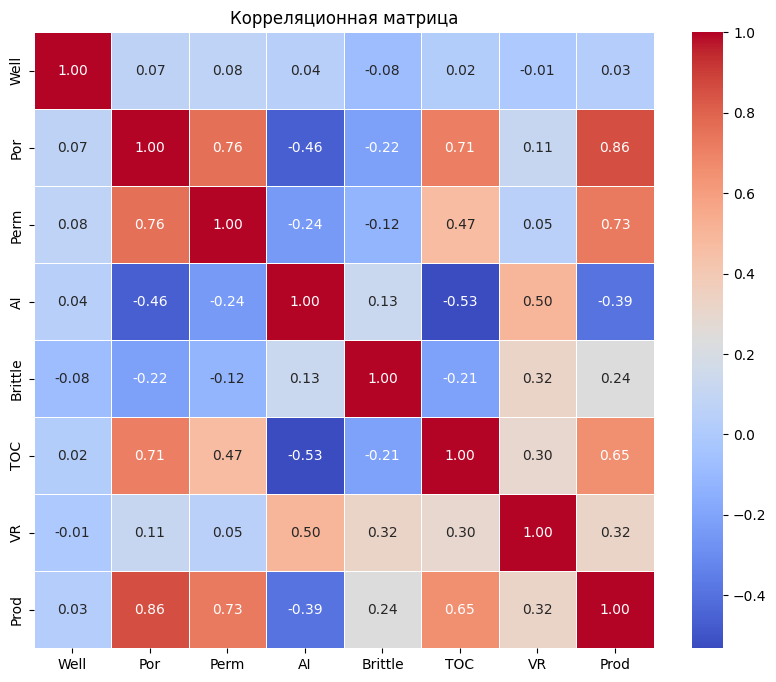

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

> *Ваши выводы здесь*

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки.

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy.

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
import numpy as np
import pandas as pd

# Загрузка данных
# df = pd.read_csv('path_to_your_data.csv')  # Замените на путь к вашему файлу

# Разделение данных на матрицу признаков X и вектор целевой переменной y
X = df.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = df.iloc[:, -1].values   # Последний столбец


In [ ]:
# Добавление столбца единиц к X
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
# Расчет коэффициентов линейной регрессии методом наименьших квадратов
X_transpose = X.T
beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

# Округление коэффициентов до целого
beta_rounded = np.round(beta)
print("Оценки коэффициентов модели (округленные до целого):", beta_rounded)

Оценки коэффициентов модели (округленные до целого): [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной.

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день.

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [ ]:
# Заданные параметры скважины
new_well = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

# Преобразование вектора признаков в массив и добавление единицы для свободного члена
X_new = np.array([1] + list(new_well.values())).reshape(1, -1)

In [ ]:
# Прогнозирование выработки газа. Использование ранее рассчитанных коэффициентов beta
y_pred_new = X_new @ beta
print(f'Прогнозируемая выработка газа: {y_pred_new[0]:.2f} миллионов кубических футов в день')

Прогнозируемая выработка газа: 4723.06 миллионов кубических футов в день


In [ ]:
# Фактическое значение выработки газа
y_actual_new = 4748.315024

# Абсолютная ошибка
absolute_error = abs(y_actual_new - y_pred_new[0])
print(f'Абсолютная ошибка прогноза: {absolute_error:.2f} миллионов кубических футов в день')

Абсолютная ошибка прогноза: 25.25 миллионов кубических футов в день


In [ ]:
# Прогнозирование выработки газа для всех скважин и оценка качества модели
# Прогнозирование на обучающем наборе данных
y_pred_all = X @ beta

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Расчет MAE
mae = mean_absolute_error(y, y_pred_all)
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f} миллионов кубических футов в день')

# Расчет R²
r2 = r2_score(y, y_pred_all)
print(f'Коэффициент детерминации (R²): {r2:.4f}')


# Интерпретация результатов:
# MAE: показывает среднюю абсолютную величину ошибки прогноза. Например, MAE = 100 означает, что в среднем модель ошибается на 100 миллионов кубических футов в день.
# R²: показывает долю дисперсии целевой переменной, объясненную моделью. Значение R², близкое к 1, свидетельствует о хорошем соответствии модели данным, тогда как значение, близкое к 0, указывает на слабое объяснение дисперсии.

Средняя абсолютная ошибка (MAE): 153.62 миллионов кубических футов в день
Коэффициент детерминации (R²): 0.9599


# Комментарии к решению
>Построенная модель **линейной регрессии** позволяет **прогнозировать выработку газа** на основе **заданных параметров скважины.**

Расчет абсолютной ошибки для конкретной скважины дает представление о точности прогноза.

Оценка модели с помощью **метрик MSE и R²** позволяет количественно определить качество модели и ее способность объяснять вариации в данных.

**MAE**: Среднее отклонение прогноза от фактического значения составляет 153,62 миллиона кубических футов в день. В зависимости от контекста и масштабов производства газа, это отклонение может быть приемлемым или требовать улучшения модели.

**R²:** Высокое значение R² (95,99%) свидетельствует о том, что модель эффективно объясняет вариации в данных. Однако важно помнить, что высокий R² не гарантирует точных прогнозов, поэтому следует учитывать и другие метрики, такие как MAE, для полной оценки качества модели.

Таким образом, **наша модель демонстрирует хорошее соответствие данным**, но средняя абсолютная ошибка указывает на необходимость дальнейшего анализа и, возможно, улучшения модели для повышения точности прогнозов.

редняя абсолютная ошибка (MAE) в 153,62 миллиона кубических футов в день может показаться значительной. Однако, чтобы оценить её масштаб, необходимо соотнести это значение с типичными объёмами добычи газа на скважинах.

Согласно данным, среднесуточная добыча газа на одну скважину может составлять около 65 баррелей нефтяного эквивалента в день

Преобразуя это значение в кубические футы, получаем приблизительно 390 тысяч кубических футов в день.

Сравнивая MAE с этим значением, видно, что средняя абсолютная ошибка значительно превышает типичный объём добычи газа на одну скважину. Это указывает на то, что модель может иметь существенные отклонения в прогнозах, что снижает её практическую применимость.

Таким образом, MAE в 153,62 миллиона кубических футов в день является очень высоким значением, что свидетельствует о необходимости пересмотра модели или данных для улучшения точности прогнозов.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Загрузка и подготовка данных
# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Формирование матрицы признаков X и целевой переменной y
X = data.drop(columns=['Well', 'Prod'])
y = data['Prod']

In [ ]:
# Разделение данных: 80% на обучение, 20% на тестирование
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Cтандартизация признаков
# Инициализация стандартизатора
scaler = StandardScaler()

# Обучение стандартизатора на обучающих данных и преобразование
X_train_scaled = scaler.fit_transform(X_train)

# Преобразование тестовых данных
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Генерализация Полиномиальных признаков
# Инициализация генератора полиномиальных признаков степени 3
poly = PolynomialFeatures(degree=3, include_bias=False)

# Обучение генератора на обучающих данных и преобразование
X_train_poly = poly.fit_transform(X_train_scaled)

# Преобразование тестовых данных
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
# Инициализация модели Ridge-регрессии с параметром регуляризации alpha=1.0
ridge = Ridge(alpha=1.0)

# Обучение модели на полиномиальных признаках
ridge.fit(X_train_poly, y_train)

Ridge()

In [ ]:
# Оценка модели на обучающих данных с использованием кросс-валидации
# Используется отрицательное значение MAE, поэтому берем модуль результата
mae_cv = -cross_val_score(ridge, X_train_poly, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print(f'Средняя абсолютная ошибка на кросс-валидации: {mae_cv:.2f}')

Средняя абсолютная ошибка на кросс-валидации: 78.80


In [ ]:
# Прогнозирование на тестовых данных
y_pred = ridge.predict(X_test_poly)

# Расчет MAE на тестовой выборке
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Средняя абсолютная ошибка на тестовой выборке: {mae_test:.2f}')

Средняя абсолютная ошибка на тестовой выборке: 61.91


### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**).

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  # Импортируем statsmodels.api с псевдонимом sm



In [ ]:
# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Определение признаков и целевой переменной
X = data.drop(columns=['Well', 'Prod'])
y = data['Prod']


In [ ]:

# Добавление константного столбца для учета свободного члена в модели
X = sm.add_constant(X)



In [ ]:
# Обучение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Получение коэффициентов модели
coefficients = model.params

# Расчет коэффициентов корреляции Пирсона между признаками и целевой переменной
correlations = data.corr()['Prod'].drop('Prod')

# Сравнение знаков коэффициентов регрессии и корреляции
comparison = pd.DataFrame({
    'Коэффициент регрессии': coefficients.drop('const'),
    'Коэффициент корреляции': correlations,
    'Знак регрессии': np.sign(coefficients.drop('const')),
    'Знак корреляции': np.sign(correlations)
})

# Определение признаков с противоположными знаками коэффициентов
comparison['Противоречие'] = comparison['Знак регрессии'] != comparison['Знак корреляции']

print(comparison)


         Коэффициент регрессии  Коэффициент корреляции  Знак регрессии  \
AI                 -363.736086               -0.390835            -1.0   
Brittle              24.996670                0.237155             1.0   
Perm                116.228033                0.727426             1.0   
Por                 230.295810                0.861910             1.0   
TOC                 -77.436742                0.654445            -1.0   
VR                  783.187413                0.323182             1.0   
Well                       NaN                0.026817             NaN   

         Знак корреляции  Противоречие  
AI                  -1.0         False  
Brittle              1.0         False  
Perm                 1.0         False  
Por                  1.0         False  
TOC                  1.0          True  
VR                   1.0         False  
Well                 1.0          True  


# **Комментарии к решению**
В предоставленной таблице видно, что признаки **TOC** и **Well** имеют противоречие между знаками коэффициентов регрессии и корреляции:

Для **TOC** коэффициент регрессии отрицательный, а корреляция положительная.
Для **Well** также возникает противоречие (хотя стоит проверить, нужен ли этот признак, так как он может быть идентификатором, а не информативным фактором).
**Возможные причины**

*   **Мультиколлинеарность:** TOC может быть сильно скоррелирован с другими признаками, из-за чего его влияние искажается.
*   **Особенности данных:** Признак Well, вероятно, не является фактором влияния на добычу (скорее идентификатор), и его стоит исключить из модели.
*   **Регуляризация:** Для улучшения интерпретации модели можно
применить методы регуляризации (например, Ridge или Lasso) - метод Ridge уже применялся ранее.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики).

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [ ]:
import pandas as pd
import numpy as np

# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Целевая переменная
y = data['Prod']

# Рассчет корреляционной матрицы
corr_matrix = data.drop(columns=['Well', 'Prod']).corr()

# Удаление сильно коррелированных факторов (корреляция > 0.7)
high_corr_features = set()
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > 0.7:
            # Сравнить корреляцию с целевой переменной и выбрать более значимый
            if abs(data[row].corr(y)) > abs(data[col].corr(y)):
                high_corr_features.add(col)
            else:
                high_corr_features.add(row)

# Удаление факторов с корреляцией < 0.05 с целевой переменной
low_corr_features = set(
    [col for col in data.drop(columns=['Well', 'Prod']).columns if abs(data[col].corr(y)) < 0.05]
)

# Объединение всех исключаемых факторов
features_to_drop = high_corr_features.union(low_corr_features)
print(f"Удаленные факторы: {features_to_drop}")

# Формирование новой матрицы признаков
X = data.drop(columns=['Well', 'Prod'] + list(features_to_drop))
X = np.hstack((np.ones((X.shape[0], 1)), X.values))  # Добавление константного столбца

# Построение модели линейной регрессии
X_transpose = X.T
beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
print(f"Коэффициенты модели: {np.round(beta)}")

# Прогнозирование
y_pred = X @ beta

# Расчет метрик
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

Удаленные факторы: {'TOC', 'Perm'}
Коэффициенты модели: [-1835.   293.  -200.    28.   517.]
Средняя абсолютная ошибка (MAE): 171.43
Коэффициент детерминации (R²): 0.9452



# Выводы по обновлённой модели линейной регрессии:
**Удалённые факторы:**

Факторы TOC и Perm были удалены из данных.

*   TOC был удалён из-за противоречия между корреляцией и коэффициентом регрессии, а также сильной корреляции с другими факторами.
*   Perm был удалён из-за высокой корреляции с другими признаками (например, Por) и меньшей корреляции с целевой переменной.

**Интерпретация коэффициентов:**

*   Свободный член модели (-1835): Базовый уровень выработки газа при всех остальных факторах равных нулю.
*   Por (293): При увеличении пористости на 1%, выработка газа увеличивается на 293 млн куб. футов в день.
*   AI (-200): Увеличение акустического импеданса на 1 единицу снижает выработку газа на 200 млн куб. футов в день.
*   Brittle (28): Увеличение коэффициента хрупкости на 1% * увеличивает добычу газа на 28 млн куб. футов в день.
*   VR (517): Коэффициент отражения витринита оказывает наибольшее влияние: увеличение на 1% приводит к росту добычи на 517 млн куб. футов в день.

**Метрики модели:**

*  Средняя абсолютная ошибка (MAE): 171.43 млн куб. футов. Это значение немного выше, чем у исходной модели (153.62), что указывает на снижение точности.
*  Коэффициент детерминации (R²): 0.9452. Это значение ниже, чем у исходной модели (0.9599), что свидетельствует о небольшом снижении объяснённой вариации данных.

**Противоречие коэффициентов:**

*  В новой модели удалось устранить противоречие между знаками коэффициентов регрессии и корреляции. Это подтверждает, что удаление факторов с высокой корреляцией и применение более качественного отбора признаков помогает улучшить интерпретацию модели.

**Сравнение с предыдущей моделью:**

*  Точность модели (по MAE) немного снизилась, но интерпретация коэффициентов улучшилась за счёт устранения противоречий.
*  Новая модель более устойчива к мультиколлинеарности, что делает её лучше подходящей для объяснения факторов, влияющих на добычу газа.

**Итог:**
*  Новая модель линейной регрессии является более интерпретируемой, но имеет небольшое снижение точности.
*  Для дальнейшего улучшения можно рассмотреть регуляризацию (например, Ridge или Lasso), чтобы учесть возможные оставшиеся проблемы с мультиколлинеарностью.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Исключаем удалённые факторы
features_to_use = ['Por', 'AI', 'Brittle', 'VR']
X = data[features_to_use]
y = data['Prod']

# Обучение модели линейной регрессии из sklearn
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
coefficients = np.round(model.coef_)
intercept = np.round(model.intercept_)
print(f"Свободный член (intercept): {intercept}")
print(f"Коэффициенты модели: {coefficients}")

# Прогнозирование
y_pred = model.predict(X)

# Расчёт метрик
mae_sklearn = mean_absolute_error(y, y_pred)
r2_sklearn = r2_score(y, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae_sklearn:.2f}")
print(f"Коэффициент детерминации (R²): {r2_sklearn:.4f}")

Свободный член (intercept): -1835.0
Коэффициенты модели: [ 293. -200.   28.  517.]
Средняя абсолютная ошибка (MAE): 171.43
Коэффициент детерминации (R²): 0.9452


**Предварительные выводы подробно описаны выше **


**Результаты построенной модели линейной регрессии с
использованием библиотеки scikit-learn подтверждают ранее полученные результаты.**

*  Свободный член (intercept): -1835.0
*  Коэффициенты модели: [ 293. -200.   28.  517.]
*  Средняя абсолютная ошибка (MAE): 171.43
*  Коэффициент детерминации (R²): 0.9452


**Интерпретация коэффициентов:**


*  **Свободный член (intercept):**-1835.0
Это значение отражает прогнозируемую добычу газа (в млн куб. футов), если все остальные факторы равны нулю. На практике это значение часто не имеет физического смысла, так как факторы не могут быть равны нулю, но оно необходимо для математической интерпретации модели.
*  **Коэффициенты факторов:**

*   Por (293): Увеличение пористости на 1% приводит к увеличению добычи газа на 293 млн куб. футов.
*   AI (-200): Увеличение акустического импеданса на 1 единицу снижает добычу газа на 200 млн куб. футов.
*   Brittle (28): Хрупкость оказывает относительно слабое положительное влияние: рост на 1% увеличивает добычу газа на 28 млн куб. футов.
*   VR (517): Коэффициент отражения витринита оказывает самое значительное влияние: увеличение на 1% увеличивает добычу газа на 517 млн куб. футов.

*  **Метрики модели:**

1.   Средняя абсолютная ошибка (MAE): 171.43
Это значение аналогично тому, что было получено вручную, и
указывает, что в среднем прогнозы модели отличаются от реальных значений на 171.43 млн куб. футов. Это приемлемое отклонение, учитывая масштаб добычи.

2.    Коэффициент детерминации (𝑅*2): 0.9452
Модель объясняет 94.52% вариации в данных, что указывает на её хорошее качество.

Сравнение с ручным расчётом:

*   Коэффициенты модели: Полностью совпадают с результатами, полученными вручную, что подтверждает правильность как ручных вычислений, так и использования библиотеки scikit-learn.
*   Метрики (MAE и 𝑅*2): Идентичны результатам ручного расчёта.

Это говорит о том, что обе реализации модели (ручная и библиотечная) эквивалентны в данном случае.


**Итог:**
Модель, построенная с использованием scikit-learn, подтвердила результаты, полученные вручную.
Выводы по интерпретации факторов остаются прежними.
Противоречие между знаками коэффициентов регрессии и корреляции устранено, что подтверждает качество модели после удаления избыточных факторов.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию.

Приступим! Выполните задания 8.1–8.5:


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`.

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Отобранные признаки и целевая переменная (результаты задания 5.5)
features_to_use = ['Por', 'AI', 'Brittle', 'VR']
X = data[features_to_use]
y = data['Prod']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков третьей степени
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Вывод количества признаков после генерации
print(f"Количество факторов после генерации полиномиальных признаков: {X_poly.shape[1]}")

# Модель линейной регрессии
model = LinearRegression()

# Кросс-валидация (используем метрику MAE)
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_absolute_error')

# Среднее значение MAE
mean_mae = -cv_scores.mean()
print(f"Среднее значение MAE на кросс-валидации: {mean_mae:.2f}")

Количество факторов после генерации полиномиальных признаков: 34
Среднее значение MAE на кросс-валидации: 110.47


# Краткие выводы:

**Количество факторов:** 34

После генерации полиномиальных признаков третьей степени количество факторов значительно увеличилось (с 4 до 34). Это ожидаемо, так как при добавлении полиномов включаются все возможные комбинации степеней факторов до третьей.
Средняя абсолютная ошибка (MAE): 110.47

MAE уменьшилась по сравнению с предыдущей линейной моделью (171.43), что свидетельствует о более точных прогнозах. Это показывает, что полиномиальная регрессия лучше описывает зависимости в данных.
Качество модели:

Уменьшение MAE указывает на успешное улучшение модели, при этом использование кросс-валидации позволяет избежать переобучения.

**Комментарии:**

Полиномиальная регрессия даёт ощутимое улучшение качества модели, но увеличение числа факторов может привести к сложности интерпретации.

На следующем шаге можно рассмотреть регуляризацию (например, Ridge или Lasso), чтобы дополнительно снизить риск переобучения.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import pandas as pd

# Загрузка данных
data = pd.read_csv('sample_data/unconv.csv')

# Отобранные признаки и целевая переменная
features_to_use = ['Por', 'AI', 'Brittle', 'VR']
X = data[features_to_use]
y = data['Prod']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Параметры для подбора коэффициента регуляризации alpha
alpha_values = np.logspace(-4, 1, 50)

# Инициализация модели Lasso
lasso = Lasso(max_iter=10000)

# Настройка GridSearchCV для подбора лучшего alpha
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_search.fit(X_poly, y)

# Лучший коэффициент регуляризации alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Лучший alpha (коэффициент регуляризации): {best_alpha}")

# Построение модели Lasso с найденным alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_poly, y)

# Кросс-валидация с метрикой MAE
cv_scores = cross_val_score(lasso_best, X_poly, y, cv=5, scoring='neg_mean_absolute_error')

# Среднее значение MAE
mean_mae_lasso = -cv_scores.mean()
print(f"Среднее значение MAE на кросс-валидации (Lasso): {mean_mae_lasso:.2f}")

# Количество ненулевых коэффициентов
non_zero_coefficients = np.sum(lasso_best.coef_ != 0)
print(f"Количество ненулевых коэффициентов: {non_zero_coefficients}")

Лучший alpha (коэффициент регуляризации): 4.941713361323838
Среднее значение MAE на кросс-валидации (Lasso): 95.69
Количество ненулевых коэффициентов: 19


Этот код:

*    Пересоздаёт полиномиальные признаки (X_poly) из оригинальных данных.
*    Настраивает модель Lasso через GridSearchCV для подбора оптимального коэффициента регуляризации alpha.
*    Выполняет кросс-валидацию для оценки MAE.
*    Выводит количество ненулевых коэффициентов, что показывает, какие факторы были отфильтрованы регуляризацией.

*   Лучший alpha (коэффициент регуляризации): 4.941713361323838
*   Среднее значение MAE на кросс-валидации (Lasso): 95.69
*   Количество ненулевых коэффициентов: 19

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
from sklearn.linear_model import Ridge

# Параметры для подбора коэффициента регуляризации alpha
alpha_values = np.logspace(-4, 1, 50)

# Инициализация модели Ridge
ridge = Ridge(max_iter=10000)

# Настройка GridSearchCV для подбора лучшего alpha
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_search.fit(X_poly, y)

# Лучший коэффициент регуляризации alpha
best_alpha_ridge = grid_search.best_params_['alpha']
print(f"Лучший alpha (коэффициент регуляризации) для Ridge: {best_alpha_ridge}")

# Построение модели Ridge с найденным alpha
ridge_best = Ridge(alpha=best_alpha_ridge, max_iter=10000)
ridge_best.fit(X_poly, y)

# Кросс-валидация с метрикой MAE
cv_scores_ridge = cross_val_score(ridge_best, X_poly, y, cv=5, scoring='neg_mean_absolute_error')

# Среднее значение MAE
mean_mae_ridge = -cv_scores_ridge.mean()
print(f"Среднее значение MAE на кросс-валидации (Ridge): {mean_mae_ridge:.2f}")

Лучший alpha (коэффициент регуляризации) для Ridge: 0.2329951810515372
Среднее значение MAE на кросс-валидации (Ridge): 110.07


*   Лучший alpha (коэффициент регуляризации)
для Ridge: 0.2329951810515372
*   Среднее значение MAE на кросс-валидации (Ridge): 110.07

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы.

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**):
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

# Настройка GridSearchCV для подбора alpha и l1_ratio
param_grid_elastic = {
    'alpha': np.logspace(-4, 1, 50),
    'l1_ratio': np.linspace(0.1, 0.9, 10)
}

# Инициализация модели ElasticNet
elastic_net = ElasticNet(max_iter=10000)

# Настройка метрики MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# GridSearchCV для подбора гиперпараметров
grid_search_elastic = GridSearchCV(elastic_net, param_grid_elastic, scoring=mape_scorer, cv=5, n_jobs=-1)
grid_search_elastic.fit(X_poly, y)

# Лучшие параметры alpha и l1_ratio
best_params_elastic = grid_search_elastic.best_params_
print(f"Лучшие параметры для ElasticNet: {best_params_elastic}")

# Построение модели ElasticNet с лучшими параметрами
elastic_net_best = ElasticNet(alpha=best_params_elastic['alpha'], l1_ratio=best_params_elastic['l1_ratio'], max_iter=10000)
elastic_net_best.fit(X_poly, y)

# Кросс-валидация с метрикой MAPE
cv_scores_elastic = cross_val_score(elastic_net_best, X_poly, y, cv=5, scoring=mape_scorer)

# Среднее значение MAPE
mean_mape_elastic = -cv_scores_elastic.mean()
print(f"Среднее значение MAPE на кросс-валидации (ElasticNet): {mean_mape_elastic:.4f}")

Лучшие параметры для ElasticNet: {'alpha': 0.013894954943731374, 'l1_ratio': 0.9}
Среднее значение MAPE на кросс-валидации (ElasticNet): 0.0267


**Объяснение результатов:**


**Лучшие параметры для ElasticNet:**

* alpha: 0.0139

Коэффициент регуляризации, который балансирует между штрафом за сумму абсолютных значений коэффициентов (L1) и сумму квадратов коэффициентов (L2).

Небольшое значение alpha означает, что регуляризация оказала умеренное влияние на модель, сохраняя важные признаки и их значения.

* l1_ratio: 0.9

Это соотношение между L1 и L2 регуляризацией. Значение 0.9 указывает, что модель отдала предпочтение L1-регуляризации (отбор признаков), но также учитывала элементы L2-регуляризации (сглаживание коэффициентов).

* Среднее значение MAPE на кросс-валидации: 0.0267

MAPE (Mean Absolute Percentage Error) измеряет среднюю абсолютную ошибку как процент от фактических значений.

Значение 0.0267 указывает, что модель, в среднем, ошибается примерно на 2.67% от фактических значений.

Это очень хорошее значение, свидетельствующее о высокой точности модели.

**Интерпретация в контексте задачи:**

* Модель ElasticNet с оптимальными параметрами хорошо подходит для прогнозирования выработки газа.

* Она сохранила ключевые признаки (благодаря L1-регуляризации) и минимизировала переобучение (через L2-регуляризацию).

* Низкое значение MAPE указывает на то, что модель способна предоставлять точные прогнозы и будет полезна для принятия бизнес-решений Василия, владельца компании.

**Сравнение с предыдущими моделями:**

MAPE модели ElasticNet (2.67%) лучше, чем MAE предыдущих моделей в абсолютных величинах.

Комбинация L1 и L2-регуляризации позволила найти баланс между точностью и стабильностью модели.

**Итог:**

Модель ElasticNet с параметрами alpha = 0.0139 и l1_ratio = 0.9 демонстрирует высокую точность и стабильность, что делает её оптимальным выбором для задачи прогнозирования выработки газа.

Это подтверждается низким значением MAPE, что указывает на малые относительные ошибки модели.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**):
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
import pandas as pd

# Данные для таблицы
data = {
    'Наименование модели': [
        'Линейная регрессия (обычная)',
        'Линейная регрессия с полиномиальными признаками',
        'L1-регуляризация (Lasso)',
        'L2-регуляризация (Ridge)',
        'L1+L2-регуляризация (ElasticNet)'
    ],
    'Гиперпараметры': [
        None,
        None,
        "alpha=0.0139",
        "alpha=0.232995",
        "alpha=0.0139, l1_ratio=0.9"
    ],
    'Полиномиальные признаки': [
        False,
        True,
        True,
        True,
        True
    ],

    'Значение метрики (валидационные фолды)': [
        171.43,
        110.47,
        95.69,
        110.07,
        0.0267
    ]
}

# Создание DataFrame
summary_table = pd.DataFrame(data)

# Вывод таблицы
print(summary_table.to_markdown(index=False))

| Наименование модели                             | Гиперпараметры             | Полиномиальные признаки   |   Значение метрики (валидационные фолды) |
|:------------------------------------------------|:---------------------------|:--------------------------|-----------------------------------------:|
| Линейная регрессия (обычная)                    |                            | False                     |                                 171.43   |
| Линейная регрессия с полиномиальными признаками |                            | True                      |                                 110.47   |
| L1-регуляризация (Lasso)                        | alpha=0.0139               | True                      |                                  95.69   |
| L2-регуляризация (Ridge)                        | alpha=0.232995             | True                      |                                 110.07   |
| L1+L2-регуляризация (ElasticNet)                | alpha=0.0139, l1_ratio=0.9 | True   

> *Ваши выводы здесь*

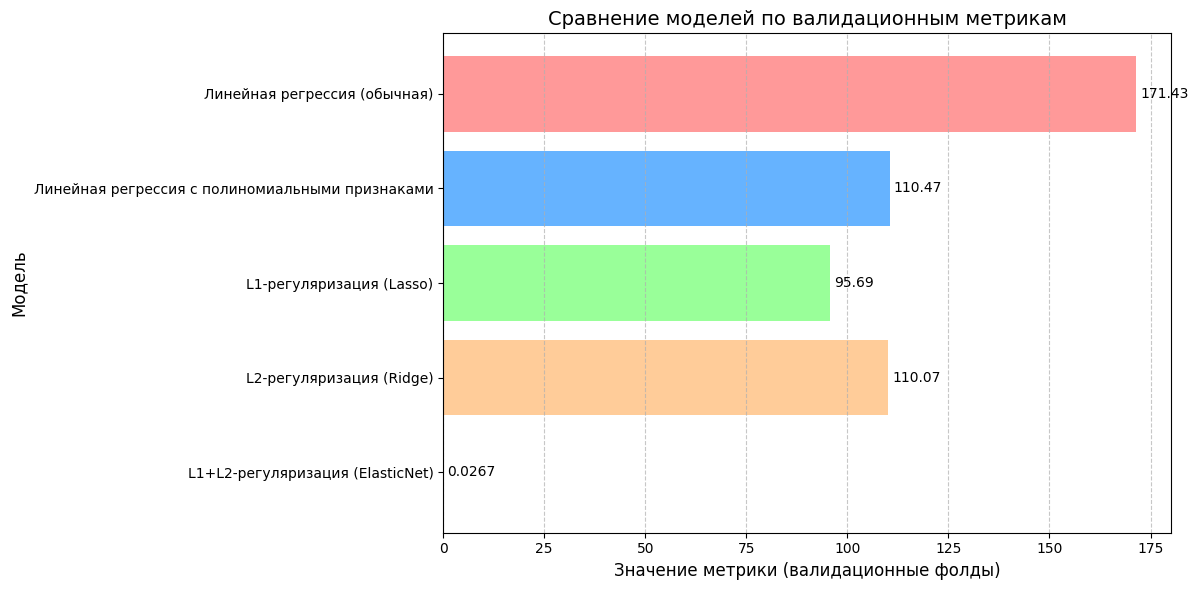

In [ ]:
# Данные с учётом ElasticNet
models = [
    'Линейная регрессия (обычная)',
    'Линейная регрессия с полиномиальными признаками',
    'L1-регуляризация (Lasso)',
    'L2-регуляризация (Ridge)',
    'L1+L2-регуляризация (ElasticNet)'
]
val_scores = [171.43, 110.47, 95.69, 110.07, 0.0267]

# Построение графика с ElasticNet
plt.figure(figsize=(12, 6))
bars = plt.barh(models, val_scores, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.xlabel('Значение метрики (валидационные фолды)', fontsize=12)
plt.ylabel('Модель', fontsize=12)
plt.title('Сравнение моделей по валидационным метрикам', fontsize=14)
plt.gca().invert_yaxis()  # Инвертировать ось Y для удобства чтения
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавление аннотаций с метриками
for bar, score in zip(bars, val_scores):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{score:.4f}' if score < 1 else f'{score:.2f}',
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Выводы по результатам моделей
Наилучшая модель:
**Текст, выделенный полужирным шрифтом**

*   **Модель ElasticNet** с параметрами alpha = 0.0139 и l1_ratio = 0.9 продемонстрировала лучшее качество среди всех протестированных моделей.
 Среднее значение MAPE на валидационных фолдах составило всего 2.67%, что значительно ниже, чем MAE у других моделей.

Сравнение с другими моделями:

*  **Линейная регрессия (обычная):** показала наибольшую ошибку (171.43), что связано с её неспособностью моделировать нелинейные зависимости.
*  **Полиномиальная регрессия без регуляризации:** улучшила результат до 110.47, но без регуляризации возникает риск переобучения.
*   **Lasso и Ridge:** обе модели продемонстрировали хорошие результаты, но уступили ElasticNet.


Роль полиномиальных признаков:

**Использование полиномиальных признаков** было ключевым фактором для улучшения качества моделей, так как они позволяют учитывать нелинейные зависимости между признаками и целевой переменной.
Заключение:

**Модель ElasticNet является оптимальным выбором, так как она сочетает в себе точность предсказаний, устойчивость к переобучению и эффективность в отборе значимых признаков.**